## Contents
*regions*
1. Plotting avg/median(still to be compared) of polarization wrt distance from the filament

In [1]:
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from regions import Regions
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion


In [2]:
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions1.reg'
orion_A_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits'
col_dens_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm6_dust.fits'

with fits.open(col_dens_file) as col_dens:
    tau353 = col_dens[0].data

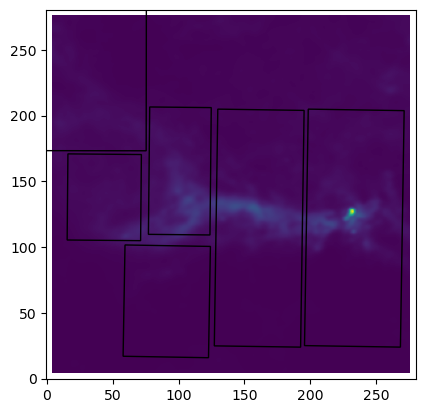

In [3]:
#Load the fits map data
orion_A = fits.open(orion_A_file)
pol_frac = orion_A[4].data

#Plot the column density map to plot the regions over
plt.imshow(tau353)

#Flip y axis to align with original map
plt.gca().invert_yaxis()

#Define the WCS transformation
wcs = WCS(orion_A[4].header)

#Define a region mask
regions = Regions.read(regions_file, format = 'ds9')
regions_list = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    
#Convert the region to a mask    
    regions_list.append(region0.to_pixel(wcs))
    regions_list[x].plot()

#Save plot
plt.savefig('col_dens_r1')

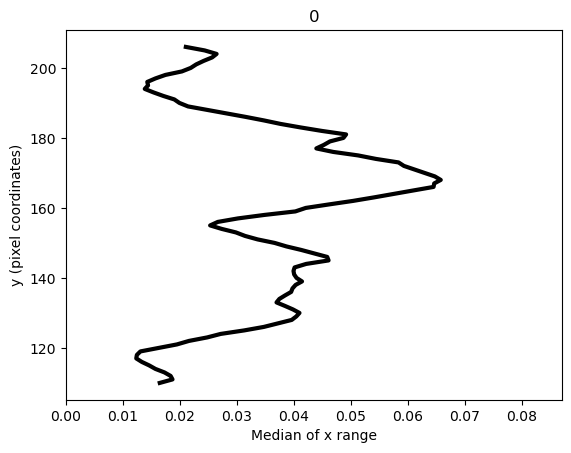

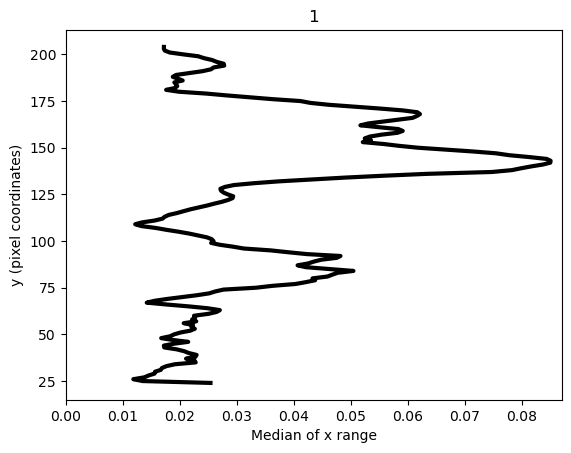

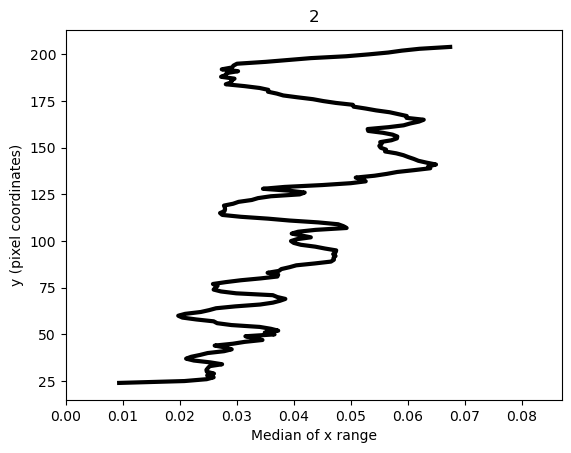

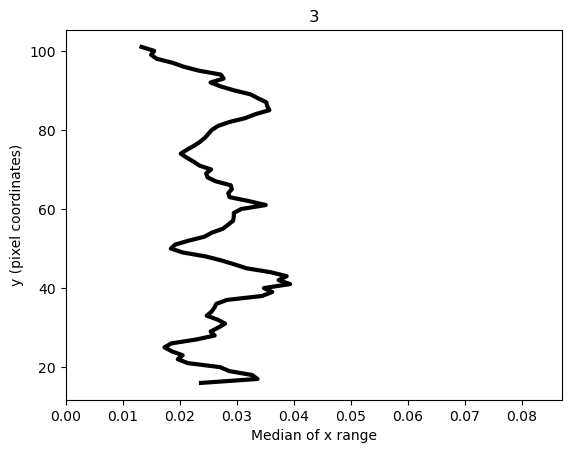

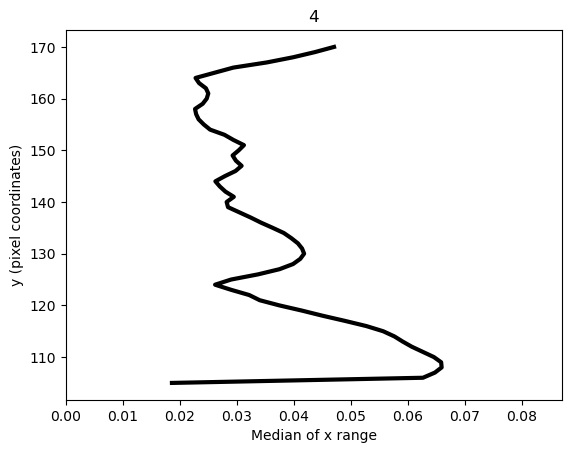

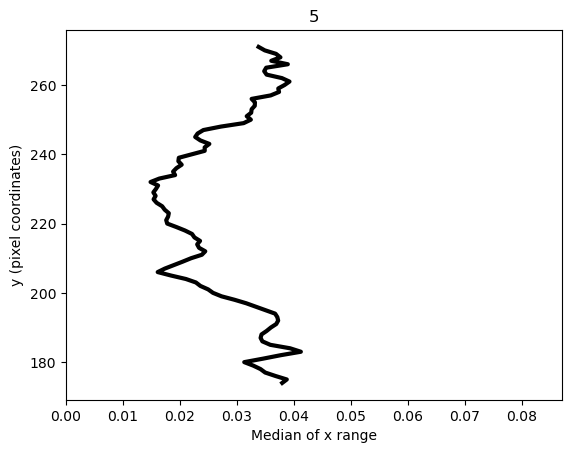

In [9]:
avg_x_range_list = []
y_range_list = []

for x in range (len(regions_list)):
    mask0 = regions_list[x].to_mask(subpixels=10)
    
    # Get the mask array
    mask_data_highres = mask0.to_image(shape=pol_frac.shape)

    # Downsample the mask to the original image resolution
    mask_data = np.round(np.resize(mask_data_highres, pol_frac.shape)).astype(bool)

    # Extract the data within the region
    masked_data = np.ma.masked_array(pol_frac, mask=~mask_data)

    # Define the x range as the x range of the mask
    x_range = [np.min(np.where(mask_data == False)[1]), np.max(np.where(mask_data == False)[1])]

    # Define the y range and calculate the average for each y value within the region
    y_range = np.arange(masked_data.shape[0])  # y values in pixel coordinates
    avg_x_range = np.nanmedian(masked_data[:, x_range[0]:x_range[1]], axis=1)

    # Plot the average of the x range as a function of y
    plt.plot(avg_x_range, y_range, lw = 3, color = 'black')
    plt.title(x)
    plt.xlim(0, 0.087)
    plt.ylabel('y (pixel coordinates)')
    plt.xlabel('Median of x range')
    plt.savefig('/Users/alisonandrade/Documents/alison_17/590thesis/orion/plots/distancefunc1_med_scaled'+str(x), transparent = True)

    plt.show()
    
    avg_x_range_list.append(avg_x_range)
    y_range_list.append(y_range)
    
